In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print(tf.__version__)

2.0.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)=fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

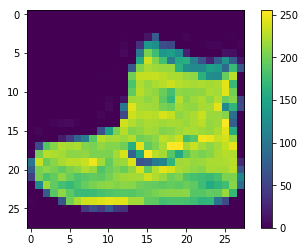

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [8]:
#Preprocess the dataset
train_images = train_images/255
test_images = test_images/255

In [9]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

C:\Users\RushabhShah\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


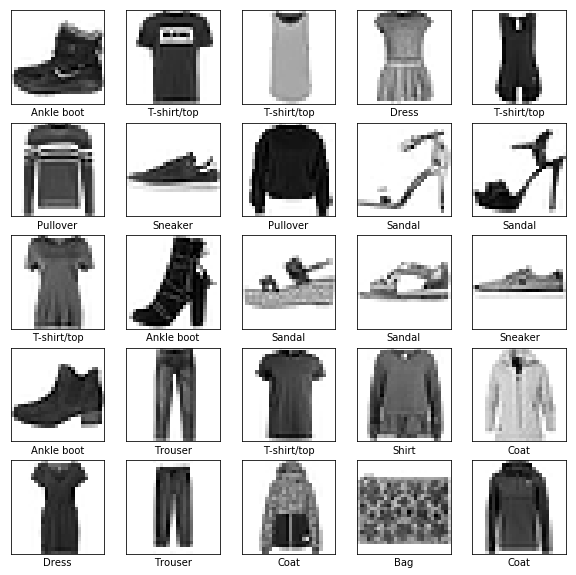

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap= plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    

In [11]:
#Neural Network
#Input layer - Flatten the 2 dimensional array(28*28) into 1d array (784*1)
#Hidden layer - Dense fully connected layer of 28 nodes (relu)
#Output layer - Dense fully connected layer of 10 nodes (softmax)

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
#Compile the model
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=["acc"])

In [14]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 243us/sample - loss: 0.4977 - acc: 0.8249
Epoch 2/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3762 - acc: 0.8634
Epoch 3/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3404 - acc: 0.8759
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3125 - acc: 0.8851
Epoch 5/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2949 - acc: 0.8910
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2802 - acc: 0.8961
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2686 - acc: 0.8997
Epoch 8/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2571 - acc: 0.9039
Epoch 9/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2468 - acc: 0.9085
Epoch 10/10
60000/60000 [==============================

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
#Making Predictions
test_loss,test_accuracy = model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [17]:
predictions = model.predict(test_images)

In [18]:
test_images.shape

(10000, 28, 28)

In [19]:
predictions.shape

(10000, 10)

In [20]:
predictions[0]

array([2.5539835e-08, 6.6177684e-13, 2.1358017e-12, 8.5227943e-11,
       1.4277023e-10, 2.8044553e-05, 2.1234607e-09, 2.9752089e-03,
       4.9386191e-08, 9.9699664e-01], dtype=float32)

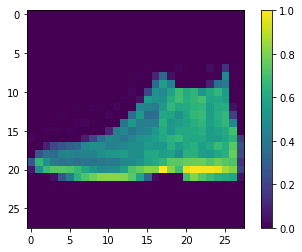

In [21]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()

In [22]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array,true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label==true_label:
        color='green'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),color=color)

In [23]:
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label =predictions_array,true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

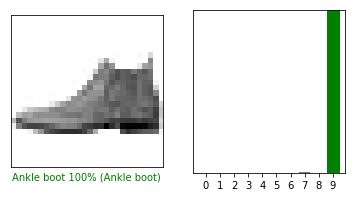

In [24]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

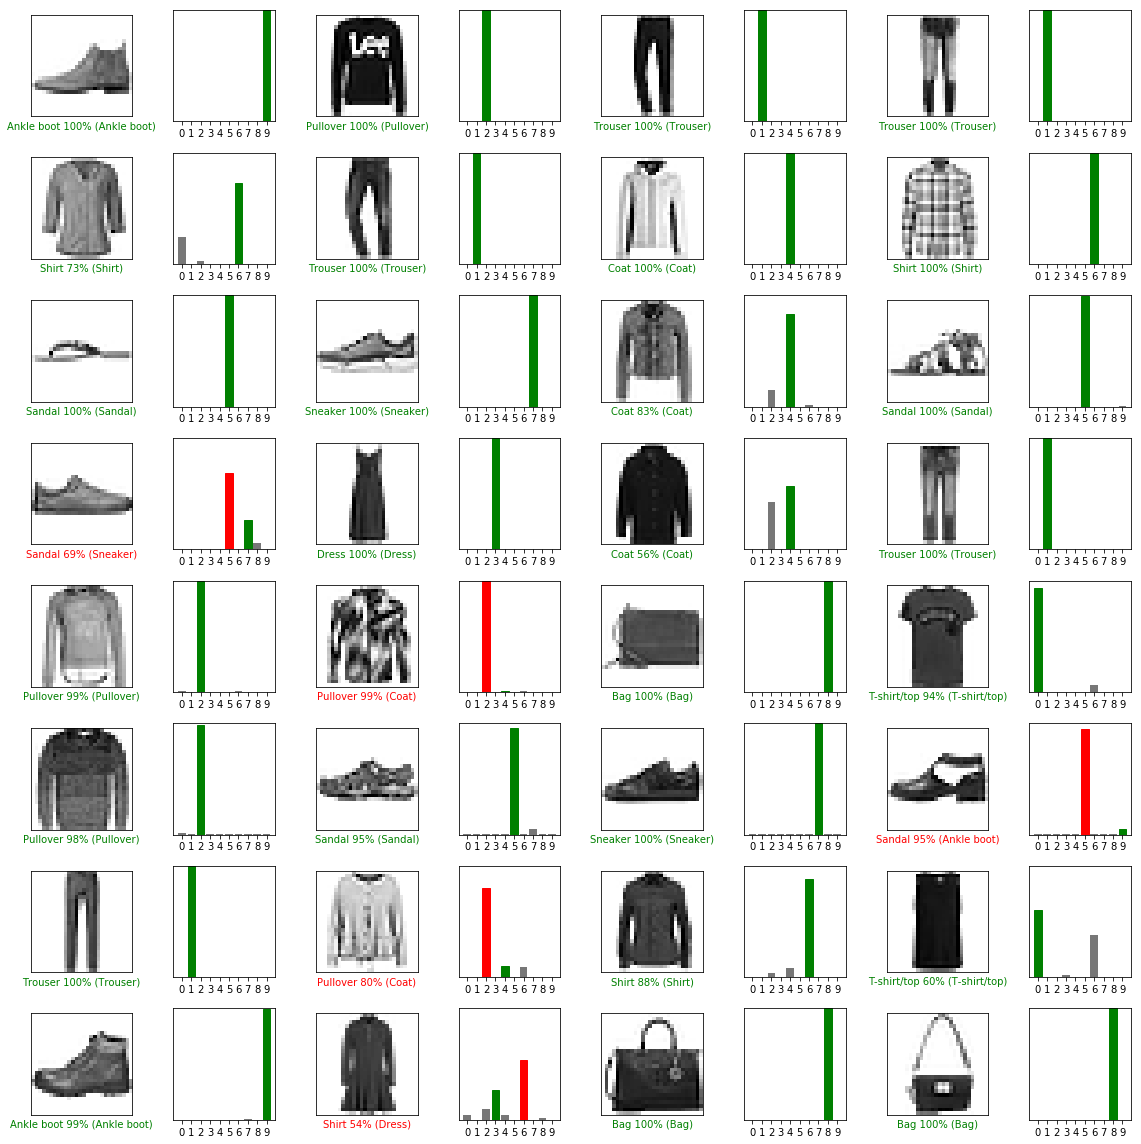

In [25]:
rows,cols = 8,4
num_images= rows*cols
plt.figure(figsize=(2*2*cols,2*rows))
for i in range(num_images):
    plt.subplot(rows, 2*cols, 2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(rows,2*cols, 2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()